In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from two_d import generate, Discrete2D

### построим функцию распределения

In [2]:
rng = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(rng, rng)
Z = (3 / (8 * math.pi)) * (2 - np.sqrt(X**2 + Y**2))
print(Z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

[[-0.0988862  -0.09055393 -0.0824492  ... -0.07458967 -0.0824492
  -0.09055393]
 [-0.09055393 -0.08200527 -0.07367885 ... -0.0655929  -0.07367885
  -0.08200527]
 [-0.0824492  -0.07367885 -0.06512434 ... -0.05680443 -0.06512434
  -0.07367885]
 ...
 [-0.07458967 -0.0655929  -0.05680443 ... -0.04824341 -0.05680443
  -0.0655929 ]
 [-0.0824492  -0.07367885 -0.06512434 ... -0.05680443 -0.06512434
  -0.07367885]
 [-0.09055393 -0.08200527 -0.07367885 ... -0.0655929  -0.07367885
  -0.08200527]]


### построим функцию по выборке

In [3]:
n = 100000
ranges = [[-2, 2], [-2, 2]]
x, y = generate(n)

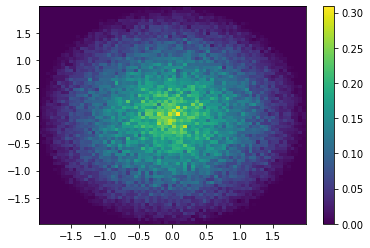

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=70, normed=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1])
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

plt.show()

plt.hist2d(x, y, bins=70, density=True)
plt.colorbar()
plt.show()

In [5]:
def get_bins_count(n):
    if n <= 100:
        return int(np.sqrt(n))
    return 4 * int(np.log(n))

def generate_borders(x_var, segments):
    n = len(x_var)
    res = [x_var[0]]
    for i in range(n // segments - 1, n - 1, n // segments):
        res.append((x_var[i] + x_var[i + 1]) / 2)
    res.append(x_var[-1])
    return np.array(res)

In [6]:
x_p_sorted = np.array(sorted(x))
y_p_sorted = np.array(sorted(y))
bins = get_bins_count(n)

borders_eq_x = generate_borders(x_p_sorted, bins)
borders_eq_y = generate_borders(y_p_sorted, bins)

### проверим критерий хи квадрат

In [7]:
def f(x, y):
    return (3 / (8 * math.pi)) * (2 - math.sqrt(x**2 + y**2))

def pearson_chi_2d(x_p, y_p, bins_x, bins_y):
    n, m = len(bins_x) - 1, len(bins_y) - 1
    cnt = len(x_p)
    
    chi_tab, _, _ = np.histogram2d(x_p, y_p, bins=[bins_x, bins_y], density=True)

    chi_val = 0
    for i in range(n):
        for j in range(m):
            pij = f((bins_x[i] + bins_x[i + 1]) / 2, (bins_y[j] + bins_y[j + 1]) / 2)
            chi_val += (chi_tab[i, j] - pij)**2 / pij
    
    return chi_val

In [8]:
from scipy.stats import chi2

In [9]:
exp_criteria = pearson_chi_2d(x, y, borders_eq_x, borders_eq_y)
theor_criteria = chi2.ppf(0.05, len(borders_eq_x) * len(borders_eq_y))

print('Experimental criteria: {}, theoretical criteria: {}'.format(exp_criteria, theor_criteria))

if exp_criteria < theor_criteria:
    print('criteria accepted')

Experimental criteria: 2.8371336121722677, theoretical criteria: 2010.14501669987
criteria accepted


### построим плотности распределения

### x, равноинтервальная

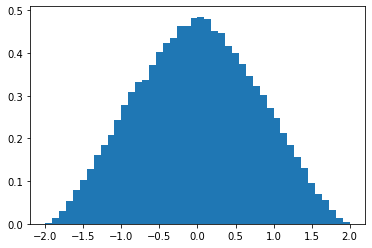

In [10]:
vals_x, bins_x, _ = plt.hist(x, bins=bins, range=ranges[0], density=True)

### x, равновероятностная

In [11]:
plt.xlim(ranges[0])
vals_int_x, bins_int_x, _ = plt.hist(x_p_sorted, bins=borders_eq_x, density=True)

### y, равноинтервальная

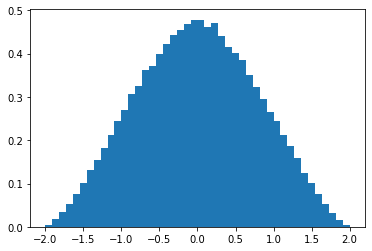

In [12]:
vals_y, bins_y, _ = plt.hist(y, bins=bins, range=ranges[1], density=True);

### y, равновероятностная

In [13]:
plt.xlim(ranges[1])
vals_int_y, bins_int_y, _ = plt.hist(y_p_sorted, bins=borders_eq_y, density=True)

In [14]:
def get_val_counts(arr):
    counts = {}
    for x in arr:
        counts[x] = counts.get(x, 0) + 1
        
    return counts

def build_distribution_function(x_var):
    counts = get_val_counts(x_var)
    
    F = [0]
    for i in range(len(x_var) - 1):
        F.append(F[i] + counts[x_var[i]] / n)
        
    return F

### получим эмпирические функции распределения по вариационным рядам

In [15]:
F_x = build_distribution_function(x_p_sorted)
F_y = build_distribution_function(y_p_sorted)

### F_x

In [16]:
plt.xlim(ranges[0])
plt.step(x_p_sorted, F_x)

### F_y

In [17]:
plt.xlim(ranges[1])
plt.step(y_p_sorted, F_y)

### Точечные оценки

### Мода

In [18]:
def mode(vals, bins):
    mode_pos = np.argmax(vals)
    return (bins[mode_pos] + bins[mode_pos + 1]) / 2

mode_x = mode(vals_x, bins_x)
mode_y = mode(vals_y, bins_y)


print('Mode for X:', mode_x)
print('Mode for Y:', mode_y)

Mode for X: 0.045454545454545414
Mode for Y: 0.045454545454545414


### Медиана

In [19]:
x_med = np.median(x)
y_med = np.median(y)

print('Median for X:', x_med)
print('Median for Y:', y_med)

Median for X: -0.00021215159117171645
Median for Y: -0.001794531206445349


### проверим зависимость X и Y

In [20]:
def chi2_criteria_tab(x_p, y_p, bins_x, bins_y):
    n, m = len(bins_x) - 1, len(bins_y) - 1
    cnt = len(x_p)
    
    chi_tab, _, _ = np.histogram2d(x_p, y_p, bins=[bins_x, bins_y], density=True)
    x_probs = np.array([np.sum(chi_tab[i, :]) for i in range(n)])
    y_probs = np.array([np.sum(chi_tab[:, i]) for i in range(m)])
    
    chi_val = 0
    for i in range(n):
        for j in range(m):
            pij = x_probs[i] * y_probs[j]
            chi_val += (chi_tab[i, j] - pij)**2 / pij
    
    return chi_val * cnt

In [21]:
exp_criteria = chi2_criteria_tab(x, y, borders_eq_x, borders_eq_y)
theor_criteria = chi2.ppf(0.05, len(borders_eq_x) * len(borders_eq_y))

print('Experimental criteria: {}, Theoretical criteria: {}'.format(exp_criteria, theor_criteria))

if exp_criteria < theor_criteria:
    print('criteria accepted')

Experimental criteria: 5391148458.48942, Theoretical criteria: 2010.14501669987


### Интервальные оценки

### Мода

In [22]:
def mode_intervals(alpha, nsamples, nelements):
    n = nsamples
    bins = get_bins_count(nelements)
    modes_x = []
    modes_y = []
    
    for i in range(nsamples):
        x_p, y_p = generate(n)
        
        x_p_sorted = np.array(sorted(x_p))
        y_p_sorted = np.array(sorted(y_p))

        borders_eq_x = generate_borders(x_p_sorted, bins)
        borders_eq_y = generate_borders(y_p_sorted, bins)
        
        vals_x, bins_x = np.histogram(x_p, bins=borders_eq_x, density=True)
        vals_y, bins_y = np.histogram(y_p, bins=borders_eq_y, density=True)
        
        modes_x.append(mode(vals_x, bins_x))
        modes_y.append(mode(vals_y, bins_y))
    

    modes_x.sort()
    modes_y.sort()
    
    interval_x = (modes_x[int(nsamples * alpha / 2)], modes_x[int(nsamples * (1 - alpha / 2))])
    interval_y = (modes_y[int(nsamples * alpha / 2)], modes_y[int(nsamples * (1 - alpha / 2))])
    
    return interval_x, interval_y

In [23]:
for nsamples in [50, 100, 1000]:
    lens_x = []
    lens_y = []
    for nelements in [100, 300, 1000]:
        print('number of samples: {}, number of elements in sample: {}\n'.format(nsamples, nelements))
        
        mode_interval_x, mode_interval_y = mode_intervals(0.05, nsamples, nelements)
        lens_x.append(mode_interval_x[1] - mode_interval_x[0])
        lens_y.append(mode_interval_y[1] - mode_interval_y[0])
        print('Mode for X:', mode_x)
        print('confidence interval for X mode:', mode_interval_x)
        
        print()

        print('Mode for Y:', mode_y)
        print('confidence interval for Y mode:', mode_interval_y)

number of samples: 50, number of elements in sample: 100

Mode for X: 0.045454545454545414
confidence interval for X mode: (-0.7264532233822751, 0.8492441422630101)

Mode for Y: 0.045454545454545414
confidence interval for Y mode: (-1.1606844713311961, 0.595293253807239)
number of samples: 50, number of elements in sample: 300

Mode for X: 0.045454545454545414
confidence interval for X mode: (-1.1898629051633225, 1.432330312536272)

Mode for Y: 0.045454545454545414
confidence interval for Y mode: (-0.8398298811760789, 1.0313028604348058)
number of samples: 50, number of elements in sample: 1000

Mode for X: 0.045454545454545414
confidence interval for X mode: (-1.0619464202334776, 1.4184222391931396)

Mode for Y: 0.045454545454545414
confidence interval for Y mode: (-1.0114332145158944, 0.9213247589024595)
number of samples: 100, number of elements in sample: 100

Mode for X: 0.045454545454545414
confidence interval for X mode: (-0.7817434342489042, 0.8383964697893093)

Mode for Y: 0.0

### Медиана

In [24]:
def median_intervals(alpha, nsamples, nelements):
    n = nsamples
    bins = get_bins_count(nelements)
    modes_x = []
    modes_y = []
    
    for i in range(nsamples):
        x_p, y_p = generate(nelements)

        modes_x.append(np.median(x_p))
        modes_y.append(np.median(y_p))
    

    modes_x.sort()
    modes_y.sort()
    
    interval_x = (modes_x[int(nelements * alpha / 2)], modes_x[int(nelements * (1 - alpha / 2))])
    interval_y = (modes_y[int(nelements * alpha / 2)], modes_y[int(nelements * (1 - alpha / 2))])
    
    print('x interval:', interval_x)
    print('y interval:', interval_y)

In [25]:
median_intervals(0.05, 1000, 1000)

x interval: (-0.06604092048016885, 0.06722728115973564)
y interval: (-0.06261985166851969, 0.06483789570212695)


### Дискретный генератор

In [26]:
n = 10
m = 10

In [27]:
xvals = np.arange(n)
yvals = np.arange(m)

In [28]:
def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        plt.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords='offset points',  # in both directions
                    ha=ha[xpos], 
                    va='bottom',
                    rotation=90)

def plot_distr(n, emp, theor, title):
    xrange = np.arange(n)

    width = 0.425

    fig, ax = plt.subplots()

    rects_pract = ax.bar(xrange - width / 2, emp, width, label='Practical')
    rects_theor = ax.bar(xrange + width / 2, theor, width, label='Theoretical')

    autolabel(rects_pract)
    autolabel(rects_theor)

    ax.set_ylim((0, ax.get_ylim()[1] * 1.25))
    fig.tight_layout()

    ax.set_title(title)
    ax.set_xticks(xrange)
    ax.legend()
    plt.show()

In [29]:
def plot_distributions(dis):
    plot_distr(dis.n, dis.x_emp, dis.x_prob_t, 'X')
    plot_distr(dis.m, dis.y_emp, dis.y_prob_t, 'Y')

In [30]:
def make_plots():
    dis = Discrete2D(n, m, xvals, yvals)
    size = dis.total_vars

    for exp_size in [size, size * 10, size * 100, size * 1000]:
        print('-' * 40)
        print('n =', exp_size)
        dis.generate(exp_size)
        plot_distributions(dis)

----------------------------------------
n = 100


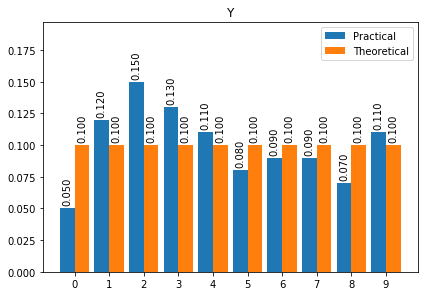

----------------------------------------
n = 1000


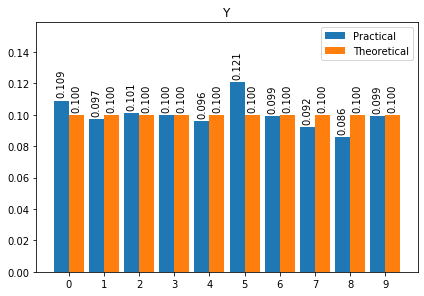

----------------------------------------
n = 10000


----------------------------------------
n = 100000


In [31]:
make_plots()

### Точечные оценки

### Матожидание

In [32]:
def expectation_table(mat, vals, axis=0):
    n, m = mat.shape
    
    res = 0
    for i in range(n):
        for j in range(m):
            val_id = j if axis else i
            res += mat[i, j] * vals[val_id]
    
    return res

In [33]:
def get_expectations():
    dis = Discrete2D(n, m, xvals, yvals)
    dis.generate(100000)
    m_xt = expectation_table(dis.theor, dis.xvals)
    m_yt = expectation_table(dis.theor, dis.yvals, 1)

    m_x = expectation_table(dis.emp, dis.xvals)
    m_y = expectation_table(dis.emp, dis.yvals, 1)
    
    print('Empirical E[X]: {}, Theoretical E[X]: {}'.format(m_x, m_xt))
    print('Empirical E[Y]: {}, Theoretical E[Y]: {}'.format(m_y, m_yt))

In [34]:
get_expectations()

Empirical E[X]: 4.500589999999999, Theoretical E[X]: 4.499999999999999
Empirical E[Y]: 4.482290000000002, Theoretical E[Y]: 4.499999999999997


### Дисперсия

In [35]:
def variation_table(mat, vals, axis=0):
    n, m = mat.shape
    e_x = expectation_table(mat, vals, axis)
    
    res = 0
    for i in range(n):
        for j in range(m):
            val_id = j if axis else i
            res += mat[i, j] * (vals[val_id] - e_x)**2
    
    return res

In [36]:
def get_variations():
    dis = Discrete2D(n, m, xvals, yvals)
    dis.generate(100000)
    d_xt = variation_table(dis.theor, dis.xvals)
    d_yt = variation_table(dis.theor, dis.yvals, 1)

    d_x = variation_table(dis.emp, dis.xvals)
    d_y = variation_table(dis.emp, dis.yvals, 1)
    
    print('Empirical Var[X]: {}, Theoretical Var[X]: {}'.format(d_x, d_xt))
    print('Empirical Var[Y]: {}, Theoretical Var[Y]: {}'.format(d_y, d_yt))

In [37]:
get_variations()

Empirical Var[X]: 8.2330996519, Theoretical Var[X]: 8.25000000000001
Empirical Var[Y]: 8.2441863559, Theoretical Var[Y]: 8.250000000000004


### Корреляция

In [38]:
def expectation_xy_table(mat, xvals, yvals):
    n, m = mat.shape

    res = 0
    for i in range(n):
        for j in range(m):
            res += mat[i, j] * xvals[i] * yvals[j]
    
    return res

In [39]:
def covariances():
    dis = Discrete2D(n, m, xvals, yvals)
    dis.generate(100000)
    m_x = expectation_table(dis.emp, dis.xvals)
    m_y = expectation_table(dis.emp, dis.xvals, 1)
    m_xy = expectation_xy_table(dis.emp, dis.xvals, dis.yvals)
    
    d_x = variation_table(dis.emp, dis.xvals)
    d_y = variation_table(dis.emp, dis.yvals, 1)

    covariance = m_xy - m_x * m_y
    r = covariance / (np.sqrt(d_x) * np.sqrt(d_y)) 
    
    print('r = {}'.format(r))

In [40]:
covariances()

r = 0.010708131039056205


### Доверительные интервалы

### Матожидание

In [41]:
import scipy
def get_exp_interval(s, val, n):
    return s * scipy.stats.norm.ppf(val) / np.sqrt(n)

In [42]:
def build_exp_intervals():
    dis = Discrete2D(n, m, xvals, yvals)
    dis.generate(100000)
    for alpha_e in [0.01, 0.05, 0.1, 0.3]:
        laplace_e = (1 - alpha_e)

        m_x = expectation_table(dis.emp, dis.xvals)
        m_y = expectation_table(dis.emp, dis.xvals, 1)
        m_xy = expectation_xy_table(dis.emp, dis.xvals, dis.yvals)

        d_x = variation_table(dis.emp, dis.xvals)
        d_y = variation_table(dis.emp, dis.yvals, 1)

        interval_len_x = get_exp_interval(d_x, laplace_e, n * m)
        interval_len_y = get_exp_interval(d_y, laplace_e, n * m)

        print('Interval for E[X] with alpha = {} is ({}, {})'.format(alpha_e, m_x - interval_len_x, m_x + interval_len_x))
        print('Interval for E[Y] with alpha = {} is ({}, {})'.format(alpha_e, m_y - interval_len_y, m_y + interval_len_y))
        print('--------')

In [43]:
build_exp_intervals()

Interval for E[X] with alpha = 0.01 is (2.585284612803604, 6.415895387196394)
Interval for E[Y] with alpha = 0.01 is (2.5644054597755543, 6.400174540224449)
--------
Interval for E[X] with alpha = 0.05 is (3.146365617651937, 5.854814382348061)
Interval for E[Y] with alpha = 0.05 is (3.126242017123406, 5.838337982876597)
--------
Interval for E[X] with alpha = 0.1 is (3.445475825182284, 5.5557041748177145)
Interval for E[Y] with alpha = 0.1 is (3.4257550068954936, 5.53882499310451)
--------
Interval for E[X] with alpha = 0.3 is (4.068845832136724, 4.932334167863274)
Interval for E[Y] with alpha = 0.3 is (4.049964444810542, 4.914615555189461)
--------


### Дисперсия

In [44]:
def get_variation_borders(s, alpha, n):
    l = s * (n - 1) / chi2.ppf(1 - alpha / 2, n - 1)
    r = s * (n - 1) / chi2.ppf(alpha / 2, n - 1)
    return l, r

In [45]:
def build_variation_intervals():
    dis = Discrete2D(n, m, xvals, yvals)
    dis.generate(100000)
    for alpha_e in [0.01, 0.05, 0.1, 0.3]:
        laplace_e = (1 - alpha_e)
        
        d_x = variation_table(dis.emp, dis.xvals)
        d_y = variation_table(dis.emp, dis.yvals, 1)

        dx_l, dx_r = get_variation_borders(d_x, alpha_e, dis.total)
        dy_l, dy_r = get_variation_borders(d_y, alpha_e, dis.total)
        interval_len = get_exp_interval(d_x, laplace_e, dis.total)
        print(interval_len)

        print('Interval for Var[X] with alpha = {} is ({}, {})'.format(alpha_e, dx_l, dx_r))
        print('Interval for Var[Y] with alpha = {} is ({}, {})'.format(alpha_e, dy_l, dy_r))
        print('-------')

In [46]:
build_variation_intervals()

0.06056727438331308
Interval for Var[X] with alpha = 0.01 is (8.139036156848643, 8.328729691718216)
Interval for Var[Y] with alpha = 0.01 is (8.149996194809006, 8.33994517126932)
-------
0.04282433511154597
Interval for Var[X] with alpha = 0.05 is (8.161408233588563, 8.3057442713129)
Interval for Var[Y] with alpha = 0.05 is (8.172398397820096, 8.31692879866336)
-------
0.03336563983953054
Interval for Var[X] with alpha = 0.1 is (8.172886737048323, 8.294016364588401)
Interval for Var[Y] with alpha = 0.1 is (8.183892358249357, 8.305185099122559)
-------
0.013652949369420216
Interval for Var[X] with alpha = 0.3 is (8.195110613674911, 8.271434311556689)
Interval for Var[Y] with alpha = 0.3 is (8.206146161580627, 8.282572637065297)
-------


### Критерий хи квадрат

In [47]:
def calc_chi(theor, emp):
    n, m = emp.shape
    
    chi_val = 0
    for i in range(n):
        for j in range(m):
            chi_val += (theor[i, j] - emp[i, j])**2 / theor[i, j]
    
    return chi_val * n * m

def chi2_1d(theor_probs, emp_probs, n):
    chi_val = 0
    for i in range(len(theor_probs)):
        chi_val += (theor_probs[i] - emp_probs[i])**2 / theor_probs[i]
    
    return chi_val * n



In [48]:
def build_chi_criteria():
    for i in [50, 500, 5000, 100000]:
        dis = Discrete2D(n, m, xvals, yvals)
        dis.generate(i)

        alpha = 0.05
        num = dis.total

        emp_chi = calc_chi(dis.theor, dis.emp)
        theor_chi = chi2.ppf(alpha, dis.total_vars)

        x_chi = chi2_1d(dis.x_prob_t, dis.x_emp, num)
        y_chi = chi2_1d(dis.y_prob_t, dis.y_emp, num)

        print('alpha =', alpha)
        print('practical = {}, theoretical = {}'.format(emp_chi, theor_chi))
        print('x practical = {}'.format(x_chi))
        print('y practical = {}'.format(y_chi))
        print('-------')

In [49]:
build_chi_criteria()

alpha = 0.05
practical = 188.0000000000001, theoretical = 77.92946516501726
x practical = 6.400000000000003
y practical = 8.000000000000002
-------
alpha = 0.05
practical = 16.400000000000002, theoretical = 77.92946516501726
x practical = 7.519999999999998
y practical = 7.879999999999998
-------
alpha = 0.05
practical = 1.8903999999999999, theoretical = 77.92946516501726
x practical = 7.43599999999999
y practical = 7.287999999999999
-------
alpha = 0.05
practical = 0.27209199999999983, theoretical = 77.92946516501726
x practical = 21.53620000000003
y practical = 19.2828
-------
